# AI Course Homework: Machine Learning Fundamentals

This notebook provides hands-on experience with key machine learning concepts: **Naive Bayes**, **Decision Trees**, **Regression (Polynomial and Logistic)**, **Neural Networks** and **CNN**. You'll implement algorithms from scratch and apply them to datasets to deepen your understanding. The notebook is divided into five sections, each with a theoretical overview and practical exercises.

**Instructions:**
- Complete all sections in the code and answer the questions.
- Submit the notebook with all code cells executed and outputs visible.
- Use `numpy` for basic operations, but implement core algorithm logic yourself where indicated



## Sections
1. **Naive Bayes**
2. **Decision Trees**
3. **Regression (Polynomial and Logistic)**
4. **Neural Networks (Perceptron and Multi-Layer Perceptron)**
5. **CNN From Scratch!**

In [28]:
Name="Kiarash Sanei"
Student_Number="402106156"

## Section 1: Naive Bayes

### Theoretical Overview
**Naive Bayes** is a probabilistic classifier that assumes features are conditionally independent given the class label, using Bayes' theorem:

$$ P(Y | F_1, ..., F_n) \propto P(Y) \prod_{i} P(F_i | Y) $$

Here, you'll implement Naive Bayes for spam classification.

### Practical Exercise: Implementing Naive Bayes
**Dataset:** Emails labeled 'spam' or 'ham' with binary features 'free' and 'money'.

| free | money | label |
|------|-------|-------|
| 1    | 0     | spam  |
| 0    | 1     | spam  |
| 0    | 0     | ham   |
| 1    | 1     | spam  |
| 0    | 0     | ham   |

**Tasks:**
1. Calculate prior probabilities $ P(\text{spam}) $ and $ P(\text{ham}) $.
2. Calculate conditional probabilities with Laplace smoothing ($ k=1 $): $ P(\text{free}=1 | \text{spam}) $, $ P(\text{free}=1 | \text{ham}) $, $ P(\text{money}=1 | \text{spam}) $, $ P(\text{money}=1 | \text{ham}) $.
3. Predict the label for a new email: $ \text{free}=1 $, $ \text{money}=0 $.

**Questions:**
- Why is Laplace smoothing important?
  - **Answer:** Because in case that there is no data for a special combination of features, it helps to prevent zero probablity.
- How does feature independence affect performance?
  - **Answer:** With such assumption, the model can work with high-dimensional problems easily, but if the features are correlated it's better not to use NB. 

In [29]:
import numpy as np

# Toy dataset
data = np.array([
    [1, 0, 'spam'],
    [0, 1, 'spam'],
    [0, 0, 'ham'],
    [1, 1, 'spam'],
    [0, 0, 'ham']
])
X = data[:, :-1].astype(int)
y = data[:, -1]

# Calculate prior probabilities
total = len(y)
p_spam = np.sum(y == 'spam') / total
p_ham = np.sum(y == 'ham') / total
print(f'P(spam) = {p_spam}, P(ham) = {p_ham}')

# Calculate conditional probabilities with Laplace smoothing
def conditional_prob(feature_idx, value, label, X, y, k=1):
    # Filter samples with the given label
    mask = (y == label)
    X_label = X[mask]
    
    # Count number of samples with the feature value
    count = np.sum(X_label[:, feature_idx] == value)
    
    # Total samples with this label
    total = len(X_label)
    
    # Apply Laplace smoothing
    return (count + k) / (total + k * 2)  # 2 because binary features (0 or 1)

p_free1_spam = conditional_prob(0, 1, 'spam', X, y)
p_free1_ham = conditional_prob(0, 1, 'ham', X, y)
p_money1_spam = conditional_prob(1, 1, 'spam', X, y)
p_money1_ham = conditional_prob(1, 1, 'ham', X, y)
print(f'P(free=1|spam) = {p_free1_spam}, P(free=1|ham) = {p_free1_ham}')
print(f'P(money=1|spam) = {p_money1_spam}, P(money=1|ham) = {p_money1_ham}')

# Predict for new email
new_email = np.array([1, 0])
p_spam_email = (p_spam * 
               conditional_prob(0, new_email[0], 'spam', X, y) * 
               conditional_prob(1, new_email[1], 'spam', X, y))
p_ham_email = (p_ham * 
              conditional_prob(0, new_email[0], 'ham', X, y) * 
              conditional_prob(1, new_email[1], 'ham', X, y))
total_p = p_spam_email + p_ham_email
p_spam_norm = p_spam_email / total_p
p_ham_norm = p_ham_email / total_p
prediction = 'spam' if p_spam_norm > p_ham_norm else 'ham'
print(f'P(spam|free=1, money=0) = {p_spam_norm}, P(ham|free=1, money=0) = {p_ham_norm}')
print(f'Prediction: {prediction}')

P(spam) = 0.6, P(ham) = 0.4
P(free=1|spam) = 0.6, P(free=1|ham) = 0.25
P(money=1|spam) = 0.6, P(money=1|ham) = 0.25
P(spam|free=1, money=0) = 0.6575342465753424, P(ham|free=1, money=0) = 0.34246575342465757
Prediction: spam


## Section 2: Decision Trees

### Theoretical Overview
**Decision Trees** split data based on features to maximize **information gain**:

$$ IG(X_i) = H(Y) - H(Y | X_i) $$
$$ H(Y) = -\sum_c P(Y=c) \log_2 P(Y=c) $$

where $ H $ is entropy. Overfitting is a risk, addressed by pruning.

### Practical Exercise: Implementing a Decision Tree
**Dataset:** Features $ \text{age} $ (young/old), $ \text{income} $ (low/high), $ \text{student} $ (yes/no), and label $ \text{buys\_product} $ (yes/no).

| age   | income | student | buys_product |
|-------|--------|---------|--------------|
| young | high   | no      | no           |
| young | high   | yes     | yes          |
| old   | high   | no      | yes          |
| old   | low    | yes     | yes          |
| young | low    | no      | no           |
| old   | low    | no      | no           |
| young | low    | yes     | yes          |
| old   | high   | yes     | yes          |

**Tasks:**
1. Implement entropy calculation.
2. Implement information gain calculation.
3. Build a tree with a max depth of 3, splitting on the highest information gain.
4. Apply pruning: stop splitting if gain < 0.1.
5. Predict for $ \text{age}=\text{young} $, $ \text{income}=\text{low} $, $ \text{student}=\text{no} $.

**Questions:**
- Why was a feature chosen for the root?
  - **Answer:** The feature with the most information gain is chosen for the root. 
- How does pruning prevent overfitting?
  - **Answer:** It keeps a rational depth for the tree and prevent it from overfitting.

In [30]:
import numpy as np

# Toy dataset
data = np.array([
    ['young', 'high', 'no', 'no'],
    ['young', 'high', 'yes', 'yes'],
    ['old', 'high', 'no', 'yes'],
    ['old', 'low', 'yes', 'yes'],
    ['young', 'low', 'no', 'no'],
    ['old', 'low', 'no', 'no'],
    ['young', 'low', 'yes', 'yes'],
    ['old', 'high', 'yes', 'yes']
])
X = data[:, :-1]
y = data[:, -1]
# Entropy calculation
def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

H_y = entropy(y)
print(f'Entropy of buys_product: {H_y}')

# Information gain calculation
def info_gain(feature_idx, X, y):
    # Calculate parent entropy
    parent_entropy = entropy(y)
    
    # Get unique values and their counts for the feature
    feature_values, value_counts = np.unique(X[:, feature_idx], return_counts=True)
    total_samples = len(y)
    
    # Calculate weighted child entropy
    child_entropy = 0
    for value, count in zip(feature_values, value_counts):
        subset_mask = X[:, feature_idx] == value
        subset_entropy = entropy(y[subset_mask])
        child_entropy += (count / total_samples) * subset_entropy
    
    return parent_entropy - child_entropy

# Decision Tree Node
class TreeNode:
    def __init__(self, feature=None, value=None, left=None, right=None, label=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.label = label

# Build Decision Tree
def build_tree(X, y, depth=0, max_depth=3, min_gain=0.1):
    # If all labels are the same or max depth reached, return a leaf node
    if len(np.unique(y)) == 1 or depth >= max_depth:
        unique_labels, counts = np.unique(y, return_counts=True)
        return TreeNode(label=unique_labels[np.argmax(counts)])
    
    # Find the best feature to split on
    best_gain = -1
    best_feature = None
    
    for feature_idx in range(X.shape[1]):
        gain = info_gain(feature_idx, X, y)
        if gain > best_gain:
            best_gain = gain
            best_feature = feature_idx
    
    # If gain is too small, return a leaf node
    if best_gain < min_gain:
        unique_labels, counts = np.unique(y, return_counts=True)
        return TreeNode(label=unique_labels[np.argmax(counts)])
    
    # Split on the best feature
    feature_values = np.unique(X[:, best_feature])
    
    # For simplicity, we'll do binary splits (first value vs others)
    # You could modify this to handle multi-way splits
    split_value = feature_values[0]
    left_mask = X[:, best_feature] == split_value
    right_mask = ~left_mask
    
    # Recursively build left and right subtrees
    left_tree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth, min_gain)
    right_tree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth, min_gain)
    
    return TreeNode(feature=best_feature, value=split_value, 
                   left=left_tree, right=right_tree)

# Predict
def predict(tree, x):
    # If leaf node, return the label
    if tree.label is not None:
        return tree.label
    
    # Check if feature value matches the split value
    if x[tree.feature] == tree.value:
        return predict(tree.left, x)
    else:
        return predict(tree.right, x)

# Build and predict
tree = build_tree(X, y)
new_instance = ['young', 'low', 'no']
prediction = predict(tree, new_instance)
print(f'Prediction for young, low, no: {prediction}')

Entropy of buys_product: 0.954434002924965
Prediction for young, low, no: no


## Section 3: Regression (Polynomial and Logistic)

### Theoretical Overview
**Polynomial Regression** fits continuous outcomes:

$$ y(x, \mathbf{w}) = \sum_{j=0}^{M} w_j x^j $$
- **Error:** $ E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2 $
- **Regularization:** Adds $ \frac{\lambda}{2} ||\mathbf{w}||^2 $ to prevent overfitting.

**Logistic Regression** predicts class probabilities:

$$ P(Y=1 | X) = \frac{1}{1 + \exp(-(\mathbf{w}^T X + b))} $$
- **Loss:** Cross-entropy.

### Practical Exercise: Polynomial and Logistic Regression
**Tasks:**
1. Fit polynomial regression (degrees 1, 3, 9) to a synthetic dataset and plot.
2. Apply Ridge regularization to degree 9 ($ \lambda = 0.01 $) and plot.
3. Implement logistic regression with gradient descent on the Decision Tree dataset.
4. Compare polynomial and logistic regression on the classification task.

**Questions:**
- Why does degree 9 overfit?
  - **Answer:** A 9th-degree polynomial has extremely high flexibility (10 parameters including the bias term), allowing it to fit not just the trend but also the noise in the training data. The model is too complex relative to the data and noise.
- How does regularization help?
  - **Answer:** The term $ \frac{\lambda}{2} ||\mathbf{w}||^2 $ in the loss function discourages the model from assigning excessively large values to the polynomial coefficients ($w_j$). This smoothens the curve and force model to use simpler patterns.   

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Regression
np.random.seed(0)
X_poly = np.linspace(0, 1, 10).reshape(-1, 1)
y_poly = np.sin(2 * np.pi * X_poly).ravel() + np.random.normal(0, 0.1, 10)

def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    return X_poly

def fit_polynomial(X_poly, y, lambda_reg=0):
    # Adding L2 regularization (ridge regression)
    # w = (X^T X + lambda I)^-1 X^T y
    XTX = np.dot(X_poly.T, X_poly)
    reg_matrix = lambda_reg * np.eye(XTX.shape[0])
    # Don't regularize the bias term (first column)
    if len(reg_matrix) > 0:
        reg_matrix[0, 0] = 0
    w = np.linalg.solve(XTX + reg_matrix, np.dot(X_poly.T, y))
    return w

def predict(X_poly, w):
    return np.dot(X_poly, w)

def sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Polynomial fits
degrees = [1, 3, 9]
plt.figure(figsize=(12, 4))
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
for i, deg in enumerate(degrees, 1):
    X_poly_train = polynomial_features(X_poly, deg)
    w = fit_polynomial(X_poly_train, y_poly)
    y_pred = predict(X_poly_train, w)
    X_test_poly = polynomial_features(X_test, deg)
    y_test_pred = predict(X_test_poly, w)
    error = sse(y_poly, y_pred)
    plt.subplot(1, 4, i)
    plt.scatter(X_poly, y_poly, color='blue', label='Data')
    plt.plot(X_test, y_test_pred, 'r-', label=f'Degree {deg}')
    plt.title(f'Degree {deg}, SSE={error:.2f}')
    plt.legend()

# Regularized degree 9
X_poly_9 = polynomial_features(X_poly, 9)
w_reg = fit_polynomial(X_poly_9, y_poly, lambda_reg=0.01)
y_pred_reg = predict(X_poly_9, w_reg)
X_test_poly_9 = polynomial_features(X_test, 9)
y_test_pred_reg = predict(X_test_poly_9, w_reg)
error_reg = sse(y_poly, y_pred_reg)
plt.subplot(1, 4, 4)
plt.scatter(X_poly, y_poly, color='blue', label='Data')
plt.plot(X_test, y_test_pred_reg, 'g-', label='Deg 9 Reg')
plt.title(f'Degree 9 Reg, SSE={error_reg:.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('regression_plots.png')
plt.close()

# Logistic Regression
X_log = np.array([
    [0, 0, 0],  # young, high, no
    [0, 0, 1],  # young, high, yes
    [1, 0, 0],  # old, high, no
    [1, 1, 1],  # old, low, yes
    [0, 1, 0],  # young, low, no
    [1, 1, 0],  # old, low, no
    [0, 1, 1],  # young, low, yes
    [1, 0, 1]   # old, high, yes
])
y_log = np.array([0, 1, 1, 1, 0, 0, 1, 1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.1, epochs=1000):
    # Add bias term
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    w = np.zeros(X.shape[1])
    
    for _ in range(epochs):
        z = np.dot(X, w)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        w -= lr * gradient
    
    return w

w_log = logistic_regression(X_log, y_log)
new_instance_log = np.array([0, 1, 0])
# Add bias term for prediction
new_instance_with_bias = np.concatenate([[1], new_instance_log])
prob = sigmoid(np.dot(new_instance_with_bias, w_log))
prediction_log = 1 if prob > 0.5 else 0
print(f'Logistic Regression prediction for young, low, no: {prediction_log} (probability: {prob:.4f})')

Logistic Regression prediction for young, low, no: 0 (probability: 0.0354)


## Section 4: Neural Networks (Perceptron and Multi-Layer Perceptron)

### Theoretical Overview
**Perceptron:** A linear classifier.
**Multi-Layer Perceptron (MLP):** Adds hidden layers for non-linear problems.

### Practical Exercise: Implementing Perceptron and MLP
**Dataset:**
| $x_1$ | $x_2$ | $y$ |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

**Tasks:**
1. Implement and train a perceptron.
2. Implement and train an MLP with 2 hidden units.
3. Compare their performance.

**Questions:**
- Why can't the perceptron solve XOR?
  - **Answer:** A single perceptron can't do so because XOR is not seperable with a single line.
- How does the MLP help?
  - **Answer:** Multi-Layer Perceptron helps us to define any shape that can seperate our data

In [32]:
import numpy as np

# Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Perceptron
class Perceptron:
    def __init__(self):
        self.w = np.zeros(3)  # weights + bias
    
    def predict(self, x):
        x_with_bias = np.insert(x, 0, 1)  # Add bias term
        return 1 if np.dot(self.w, x_with_bias) > 0 else 0
    
    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for xi, target in zip(X, y):
                xi_with_bias = np.insert(xi, 0, 1)
                prediction = self.predict(xi)
                error = target - prediction
                self.w += error * xi_with_bias

perceptron = Perceptron()
perceptron.train(X, y)
print('Perceptron predictions:', [perceptron.predict(x) for x in X])

# MLP
class MLP:
    def __init__(self, hidden_size=2, lr=0.5):
        self.lr = lr
        self.W1 = np.random.randn(2, hidden_size) * 0.1
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, 1) * 0.1
        self.b2 = np.zeros(1)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def train(self, X, y, epochs=10000):
        y = y.reshape(-1, 1)  # Reshape for matrix operations
        for _ in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backpropagation
            error = output - y
            d_output = error * self.sigmoid_deriv(self.z2)
            
            error_hidden = d_output.dot(self.W2.T)
            d_hidden = error_hidden * self.sigmoid_deriv(self.z1)
            
            # Update weights and biases
            self.W2 -= self.lr * self.a1.T.dot(d_output)
            self.b2 -= self.lr * np.sum(d_output, axis=0)
            self.W1 -= self.lr * X.T.dot(d_hidden)
            self.b1 -= self.lr * np.sum(d_hidden, axis=0)
    
    def predict(self, X):
        return np.round(self.forward(X))

mlp = MLP()
mlp.train(X, y)
print('MLP predictions:', mlp.predict(X).flatten())

Perceptron predictions: [1, 1, 0, 0]
MLP predictions: [0. 0. 1. 1.]


## Section 5: CNN From Scratch!


__CNN__ s are powerfull tools to work with in the scope of _Computer Vision_. You have seen MLPs before and know how to do forward and backward pass on them. In this part, we want to create a convolutional layer (a simple one, of course!) just to understand well that how a Convolutional Layer works, behind the scenes. You can read more about Convolutional Neural Networks in this [Link](https://medium.com/thedeephub/convolutional-neural-networks-a-comprehensive-guide-5cc0b5eae175)



__FORWARD PASS__:

In forward pass, you should apply the convolution operation on the input image. The convolution operation is as follows:

$$
\text{output}[i, j] = \sum_{k=0}^{K-1} \sum_{l=0}^{L-1} \text{input}[i+k, j+l] \times \text{kernel}[k, l]
$$

You can see a sample convolution operation (with a $3 \times 3$ kernel) in the following image:
<div style="text-align:center;">
  <img src="./Images/Conv.gif" /> 
</div>

Please note that, these are samples for you to understand the operation better. For _forward pass_ that you should implement, please notice that you should convolve the kernel along all $C$ channels of the input image. So, the output shape should be $(N, H_{out}, W_{out})$. These values are calculated as follows:

$$
H_{out} = \frac{H_{in} + 2 \times \text{padding}}{\text{stride} - HH} + 1
$$
$$
W_{out} = \frac{W_{in} + 2 \times \text{padding}}{\text{stride} - WW} + 1
$$


where $HH$ and $WW$ are the height and width of the kernel, respectively. __stride__ is the step size of the kernel, and __padding__ is the number of zeros that should be padded to the input image. Please also note that $b$ stands for bias, which is a scalar value that should be added to the output of the convolution operation. (for each kernel)

You can see a more detailed example, below:

<div style="text-align:center;">
  <img src="./Images/conv3.gif" /> 
</div>




__Backward Pass__:

In backward pass, you should calculate gradient of output with respect to the input image and the kernel. These gradients will be used in _optimization_ to update kernel weights. (You saw something similar, in using MLPs with gradient descent algorithm!). So, we need $d_x$, $d_w$ and $d_b$ in the backward pass. These are calculated as follows:

$$
dx_{padded} [n, :, i * stride: i * stride + HH, j * stride: j * stride + WW] += w[f] \times dout[n, f, i, j]
$$

$$
dw_{f} = \sum_{n=0}^{N - 1} \sum_{i=0}^{H_{out} - 1} \sum_{j=0}^{W_{out} - 1} x_{padded}[n, :, i * stride: i * stride + HH, j * stride: j * stride + WW] \times dout[n, f, i, j]  
$$

$$
db_{f} = \sum_{n=0}^{N - 1} \sum_{i=0}^{H_{out} - 1} \sum_{j=0}^{W_{out} - 1} dout[n, f, i, j]
$$

For better understanding of the backward pass, you can see the following image:

<div style="text-align:center;">
  <img src="./Images/backprop_cs231n.png" />
</div>


In [33]:
import numpy as np


class MyConv:
    def __init__(self, stride, padding):
        self.stride = stride
        self.padding = padding

    def forward(self, x, w, b):
        out = None

        ####### TO DO : Implement Forward pass of Conv2D #######
        ########################################################
        N, C, H, W = x.shape
        F, C, HH, WW = w.shape
        pad = self.padding
        stride = self.stride
        
        # Calculate output dimensions
        H_out = 1 + (H + 2 * pad - HH) // stride
        W_out = 1 + (W + 2 * pad - WW) // stride
        
        # Pad the input
        x_pad = np.pad(x, ((0, 0), (0, 0), (pad, pad), (pad, pad)), mode='constant')
        
        # Initialize output
        out = np.zeros((N, F, H_out, W_out))
        
        for n in range(N):
            for f in range(F):
                for k in range(H_out):
                    for l in range(W_out):
                        # Get current window
                        window = x_pad[n, :, k*stride:k*stride+HH, l*stride:l*stride+WW]
                        # Convolve and add bias
                        out[n, f, k, l] = np.sum(window * w[f]) + b[f]

        ####### TO DO : End #######
        #############################

        cache = (x, w, b, x_pad)
        self.cache = cache
        return out

    def backward(self, dout):
        dx, dw, db = None, None, None

        x, w, b, x_padded = self.cache

        ####### TO DO : Implement backward pass #######
        ###############################################
        N, C, H, W = x.shape
        F, C, HH, WW = w.shape
        N, F, H_OUT, W_OUT = dout.shape

        dw = np.zeros_like(w)
        dx_padded = np.zeros_like(x_padded)
        db = np.zeros_like(b)

        for n in range(N):
            for f in range(F):
                for i in range(H_OUT):
                    for j in range(W_OUT):
                        # Gradient for weights
                        window = x_padded[n, :, i*self.stride:i*self.stride+HH, j*self.stride:j*self.stride+WW]
                        dw[f] += window * dout[n, f, i, j]
                        
                        # Gradient for input
                        dx_padded[n, :, i*self.stride:i*self.stride+HH, j*self.stride:j*self.stride+WW] += w[f] * dout[n, f, i, j]
                        
                        # Gradient for bias
                        db[f] += dout[n, f, i, j]

        # Remove padding from dx
        if self.padding > 0:
            dx = dx_padded[:, :, self.padding:-self.padding, self.padding:-self.padding]
        else:
            dx = dx_padded

        ####### TO DO : End #######
        #############################

        self.dx = dx
        self.dw = dw
        self.db = db
        return dx, dw, db

In [34]:
##### DO NOT CHANGE ######
def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [35]:
# A simple test for forward pass (DO NOT CHANGE)

x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

out = MyConv(stride=2, padding=1).forward(x, w, b)
correct_out = np.array([[[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]]])

# The outputted difference which is printed, should be around 1e-8
print ('Testing conv_forward_naive')
print ('difference: ', rel_error(out, correct_out))

Testing conv_forward_naive
difference:  2.2121476417505994e-08


In [36]:
def eval_numerical_gradient_array(f, x, df, h=1e-5):
  grad = np.zeros_like(x)
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    ix = it.multi_index
    
    oldval = x[ix]
    x[ix] = oldval + h
    pos = f(x).copy()
    x[ix] = oldval - h
    neg = f(x).copy()
    x[ix] = oldval
    
    grad[ix] = np.sum((pos - neg) * df) / (2 * h)
    it.iternext()
  return grad

In [37]:
# A simple test for backward pass (DO NOT CHANGE)

x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(
    2,
)
dout = np.random.randn(4, 2, 5, 5)
conv = MyConv(stride=1, padding=1)

dx_num = eval_numerical_gradient_array(
    lambda x: conv.forward(x, w, b), x, dout
)
dw_num = eval_numerical_gradient_array(
    lambda w: conv.forward(x, w, b), w, dout
)
db_num = eval_numerical_gradient_array(
    lambda b: conv.forward(x, w, b), b, dout
)

out = conv.forward(x, w, b)
dx, dw, db = conv.backward(dout)

# Your printed errors should be around 1e-9
print("Testing conv_backward_naive function")
print("dx error: ", rel_error(dx, dx_num))
print("dw error: ", rel_error(dw, dw_num))
print("db error: ", rel_error(db, db_num))

Testing conv_backward_naive function
dx error:  6.0565311587681496e-09
dw error:  1.080753268764894e-10
db error:  4.2405228917276626e-12


In this part, we try to visualize the results of the convolution operation. We will 2 sample photos (in `Images/Sample`) and then we will use our `MyConv` class to apply some cool convolutions (and see their result on an image).

In [38]:
from PIL import Image

first_img, second_img = Image.open("./Sample/image_1.jpg"), Image.open(
    "./Sample/image_2.jpg"
)
first_img = first_img.resize((256, 256))
second_img = second_img.resize((256, 256))

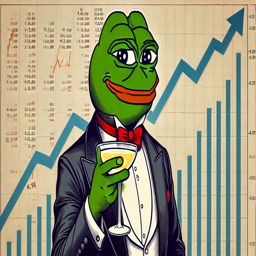

In [39]:
first_img

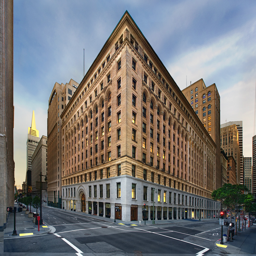

In [40]:
second_img

Convolutions have some interesting usages in image processing. For example, you can extract edges from an image by applying a convolution with a kernel that detects edges. Or you can convolve a specific kernel with your image to make it grayscale or blurred! Look at the definitions below:

__Edge Detection Kernel__:

_Sobel_ is one of the most famous edge detection kernels. It has two kernels, one for detecting vertical edges and the other for horizontal edges. You can see the kernels below:
$$
\text{Sobel}_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

$$
\text{Sobel}_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$


__Grayscale Kernel__:

You can simply convolve the image with the following kernel to make it grayscale:

$$
\text{Grayscale\_across\_R} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.3 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

$$
\text{Grayscale\_across\_G} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.6 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

$$
\text{Grayscale\_across\_B} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.1 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

(Convolve each kernel with its corresponding channel)

__Blurring Kernel__:

One of the famous kernels to blur an image is _Gaussian Blur_. You can see the kernel below:

$$
\text{Gaussian\_Blur} = \frac{1}{16} \times \begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$


In [41]:
img_size = 256

x = np.zeros((2, 3, img_size, img_size))
x[0] = np.array(first_img).transpose(2, 0, 1)
x[1] = np.array(second_img).transpose(2, 0, 1)

# a convolution weight, holding 4 filters 3x3
w= np.random.randn(4, 3, 3, 3) * 0.1  # Small random weights

b = np.array([0, 128, 128, 0])

conv = MyConv(stride=1, padding=1)
out = conv.forward(x, w, b)

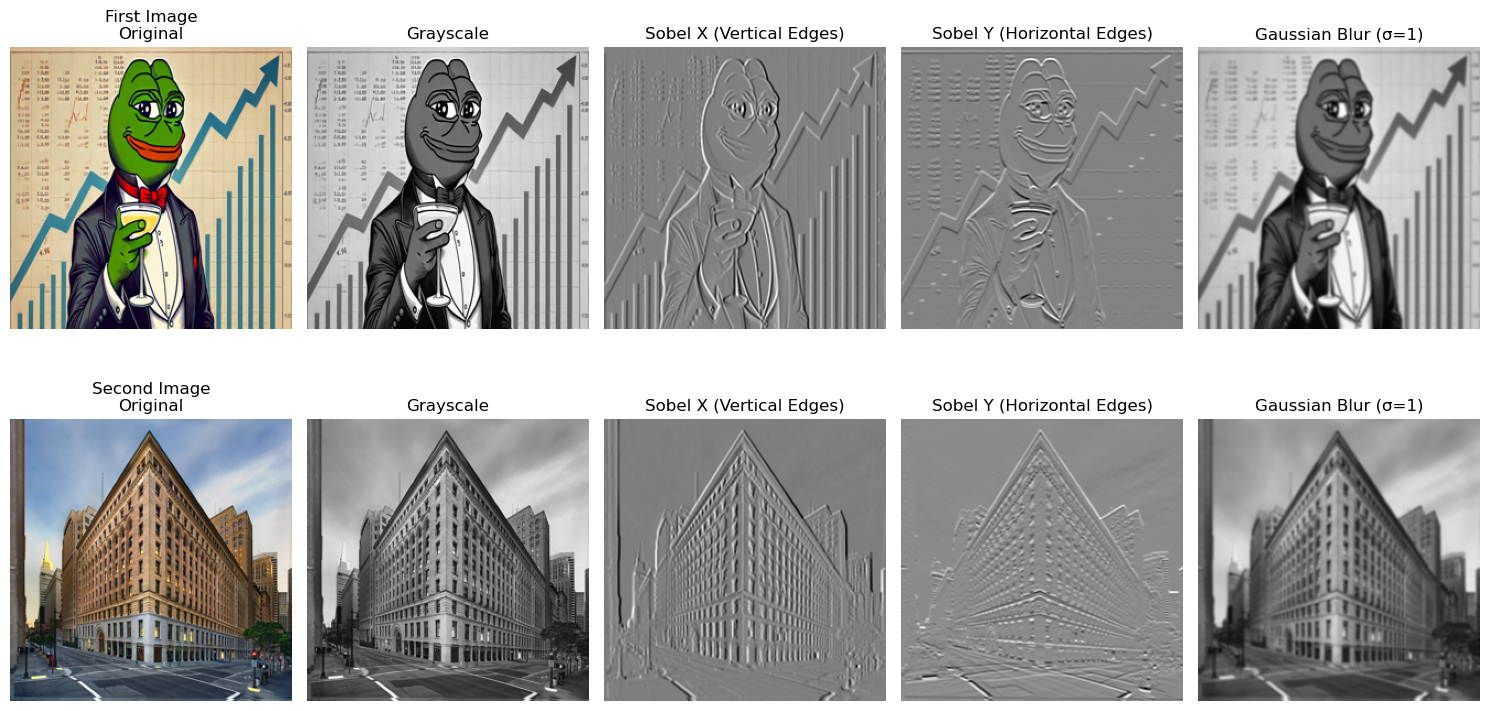

In [43]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d

# Assuming first_img and second_img are PIL Image objects
images = [first_img, second_img]
titles = ['First Image', 'Second Image']

# Convert PIL Images to numpy arrays and ensure RGB
images = [np.array(img.convert('RGB')) for img in images]

# Define kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Plotting
plt.figure(figsize=(15, 8))
for i, img in enumerate(images):
    # Convert to grayscale (luminance formula)
    gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140]) / 255.0
    
    # Apply Sobel X and Y
    sobel_x_img = convolve2d(gray, sobel_x, mode='same', boundary='symm')
    sobel_y_img = convolve2d(gray, sobel_y, mode='same', boundary='symm')
    
    # Apply Gaussian blur (sigma=1)
    gaussian_blur = gaussian_filter(gray, sigma=1)
    
    # Plot original RGB image
    plt.subplot(2, 5, i*5 + 1)
    plt.imshow(img)
    plt.title(f"{titles[i]}\nOriginal")
    plt.axis('off')
    
    # Plot grayscale
    plt.subplot(2, 5, i*5 + 2)
    plt.imshow(gray, cmap='gray', vmin=0, vmax=1)
    plt.title("Grayscale")
    plt.axis('off')
    
    # Plot Sobel X (vertical edges)
    plt.subplot(2, 5, i*5 + 3)
    plt.imshow(sobel_x_img, cmap='gray')
    plt.title("Sobel X (Vertical Edges)")
    plt.axis('off')
    
    # Plot Sobel Y (horizontal edges)
    plt.subplot(2, 5, i*5 + 4)
    plt.imshow(sobel_y_img, cmap='gray')
    plt.title("Sobel Y (Horizontal Edges)")
    plt.axis('off')
    
    # Plot Gaussian blur
    plt.subplot(2, 5, i*5 + 5)
    plt.imshow(gaussian_blur, cmap='gray', vmin=0, vmax=1)
    plt.title("Gaussian Blur (σ=1)")
    plt.axis('off')

plt.tight_layout()
plt.show()